In [1]:
import pandas as pd
import sqlite3


In [6]:
housing_df = pd.read_csv("C:/Users/meghn/OneDrive/Documents/GitHub/Healthcare-Data-Cleaning/Solution/Clean Data/housing.csv")
census_df = pd.read_csv("C:/Users/meghn/OneDrive/Documents/GitHub/Healthcare-Data-Cleaning/Solution/Clean Data/census.csv")


In [7]:
conn = sqlite3.connect(':memory:')  # In-memory SQLite database


In [8]:
housing_df.to_sql('housing', conn, index=False)
census_df.to_sql('census', conn, index=False)


640

In [10]:
query_24 = """
    SELECT 
        c.District_Name, 
        c.Population, 
        ((h.Households_Rural_Livable + h.Households_Urban_Livable) / (c.Population / 1000)) AS Livable_Per_1000,
        ((h.Households_Rural_Dilapidated + h.Households_Urban_Dilapidated) / (c.Population / 1000)) AS Dilapidated_Per_1000
    FROM census c
    JOIN housing h ON c.District_Name = h.District;
"""
result_24 = pd.read_sql_query(query_24, conn)


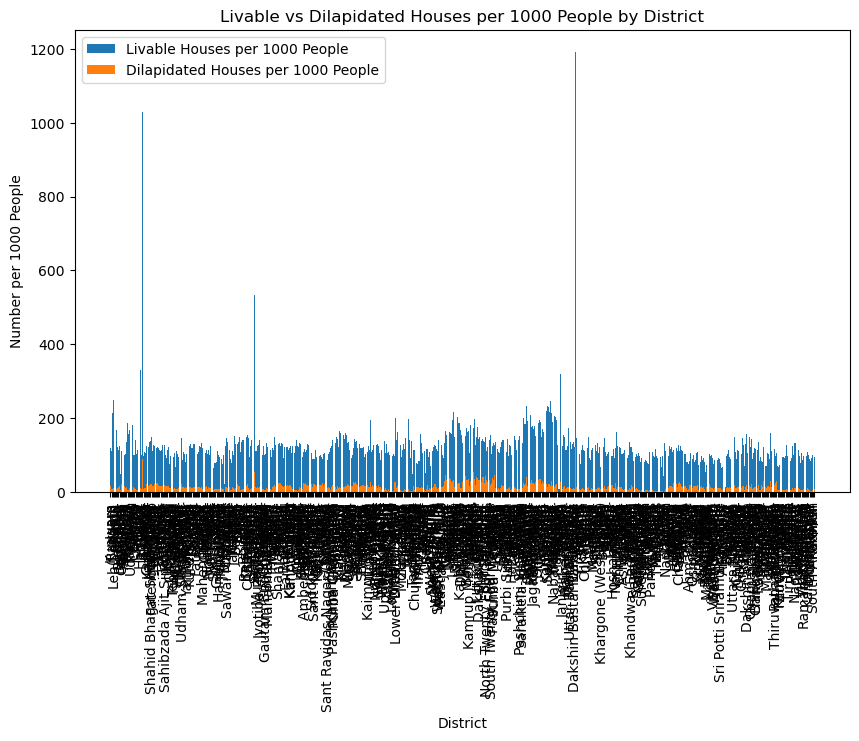

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(result_24['District_Name'], result_24['Livable_Per_1000'], label='Livable Houses per 1000 People')
plt.bar(result_24['District_Name'], result_24['Dilapidated_Per_1000'], label='Dilapidated Houses per 1000 People')
plt.xlabel('District')
plt.ylabel('Number per 1000 People')
plt.title('Livable vs Dilapidated Houses per 1000 People by District')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [22]:
import pandas as pd
import sqlite3

# Read CSV files
census_df = pd.read_csv("C:/Users/meghn/OneDrive/Documents/GitHub/Healthcare-Data-Cleaning/Solution/Clean Data/census.csv")
housing_df = pd.read_csv("C:/Users/meghn/OneDrive/Documents/GitHub/Healthcare-Data-Cleaning/Solution/Clean Data/housing.csv")
hospitals_df = pd.read_csv("C:/Users/meghn/OneDrive/Documents/GitHub/Healthcare-Data-Cleaning/Solution/Clean Data/government_hospital.csv")

# Create SQLite connection
conn = sqlite3.connect(':memory:')

# Create tables in the database and insert data
census_df.to_sql('census', conn, index=False, if_exists='replace')
housing_df.to_sql('housing', conn, index=False, if_exists='replace')
hospitals_df.to_sql('government_hospitals', conn, index=False, if_exists='replace')

# Define SQL query
query_25 = """
SELECT 
    c.State,
    SUM(g.HospitalBeds) / (SUM(c.Population) / 100000) AS Beds_Per_Lakh,
    SUM(g.Rural_Government_Beds + g.Urban_Government_Beds) / (SUM(c.Population) / 100000) AS Govt_Beds_Per_Lakh,
    (SUM(g.HospitalBeds) - SUM(g.Rural_Government_Beds + g.Urban_Government_Beds)) / (SUM(c.Population) / 100000) AS Diff_Beds_Per_Lakh
FROM 
    census c
INNER JOIN 
    government_hospitals g ON c.State = g.State
GROUP BY 
    c.State;

"""

# Execute SQL query and fetch results
result_25 = pd.read_sql_query(query_25, conn)

# Display the result
print("Problem Statement 25:")
print(result_25)

# Close the connection
conn.close()


Problem Statement 25:
                          State  Beds_Per_Lakh  Govt_Beds_Per_Lakh  \
0   Andaman and Nicobar Islands     871.036652          847.388598   
1                Andhra Pradesh     615.848782          609.057493   
2             Arunachal Pradesh    3031.811911         2779.739067   
3                         Assam    1589.254433         1483.177237   
4                         Bihar     476.444391          438.736219   
5                    Chandigarh      74.091620           73.712634   
6                  Chhattisgarh     678.280121          663.200966   
7        Dadra and Nagar Haveli     174.566276          171.365894   
8                 Daman and Diu     201.441333          197.330286   
9                           Goa     418.910627          413.151463   
10                      Gujarat    1409.530677         1388.623886   
11                      Haryana     986.404650          931.070563   
12             Himachal Pradesh    2307.489932         2167.467247  